In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import tensorflow as tf
from utils import *

2024-01-15 22:03:47.748184: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 22:03:47.749352: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 22:03:47.764300: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 22:03:47.764311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 22:03:47.764323: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [15]:
def get_best_model(dataset, dir='img'):
    path = f'data/model/{dir}/{dataset}/'
    models = os.listdir(path)
    best_model = ''
    best_acc = 0

    for model in models:
        acc = pd.read_csv(path+model+'/history.csv').val_accuracy.max()
        if acc > best_acc:
            best_acc = acc
            best_model = path+model
    return best_model +'/'

def show_heatmap(conf_matrix, report, figsize=(20,20)):
    target_names = report.columns[:-3]
    conf_matrix = pd.DataFrame(conf_matrix).div(conf_matrix.sum(axis=1), axis=0) * 100
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    mask_annotation = np.array(conf_matrix >= 0.9)

    fig.suptitle("Confusion matrix normalized by row for the full classification", fontsize=25, y=0.92)
    sns.heatmap(conf_matrix, annot=True, cmap='Greens', vmin=0, vmax=10,
                cbar=False, linecolor="black", linewidths=0.5, fmt=".0f", annot_kws={"fontsize":16, "rotation":0})

    for text, show_annot in zip(ax.texts, mask_annotation.ravel()):
        text.set_visible(show_annot)

    ax.set_yticklabels(range(len(target_names)), fontsize=25, rotation=0)
    ax.set_xticklabels(range(len(target_names)), fontsize=25, rotation=60)
    ax.set_xlabel('Predicted', fontsize=25)
    ax.set_ylabel('Actual', fontsize=25)

    label_left = ""
    for i, j in enumerate(target_names[:len(target_names)//2]):
        label_left += str(i) + ". " + j + "\n"

    label_right = ""
    for i, j in enumerate(target_names[len(target_names)//2:]):
        label_right += str(i+len(target_names)//2) + ". " + j + "\n"

    ax.text(0, figsize[1] * 3, label_left, ha='left', fontsize=20)
    ax.text(figsize[0], figsize[1] * 3, label_right, ha='left', fontsize=20)


def plot_acc_loss(history, figsize=(8,4)):
    plt.figure(figsize=figsize)
    x = range(history.shape[0])
    plt.subplot(1, 2, 1)
    plt.plot(x, history.accuracy, label='Training Accuracy')
    plt.plot(x, history.val_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(x, history.loss, label='Training Loss')
    plt.plot(x, history.val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

# Visualisation des performances d'un modèle

,precision,recall,f1-score,support
Raspberry,1.000000,0.988764,0.994350,445.000000
Grape,0.998338,0.998338,0.998338,1805.000000
Corn_(maize),0.996181,0.998360,0.997269,1829.000000
Soybean,0.994036,0.990099,0.992063,505.000000
Blueberry,0.993318,0.982379,0.987818,454.000000
Orange,0.992016,0.988072,0.990040,503.000000
Tomato,0.989954,0.988659,0.989306,4585.000000
weighted avg,0.989028,0.989017,0.989017,17572.000000
accuracy,0.989017,0.989017,0.989017,0.989017
macro avg,0.988713,0.988604,0.988646,17572.000000


Best accuracy: 0.9890735149383544


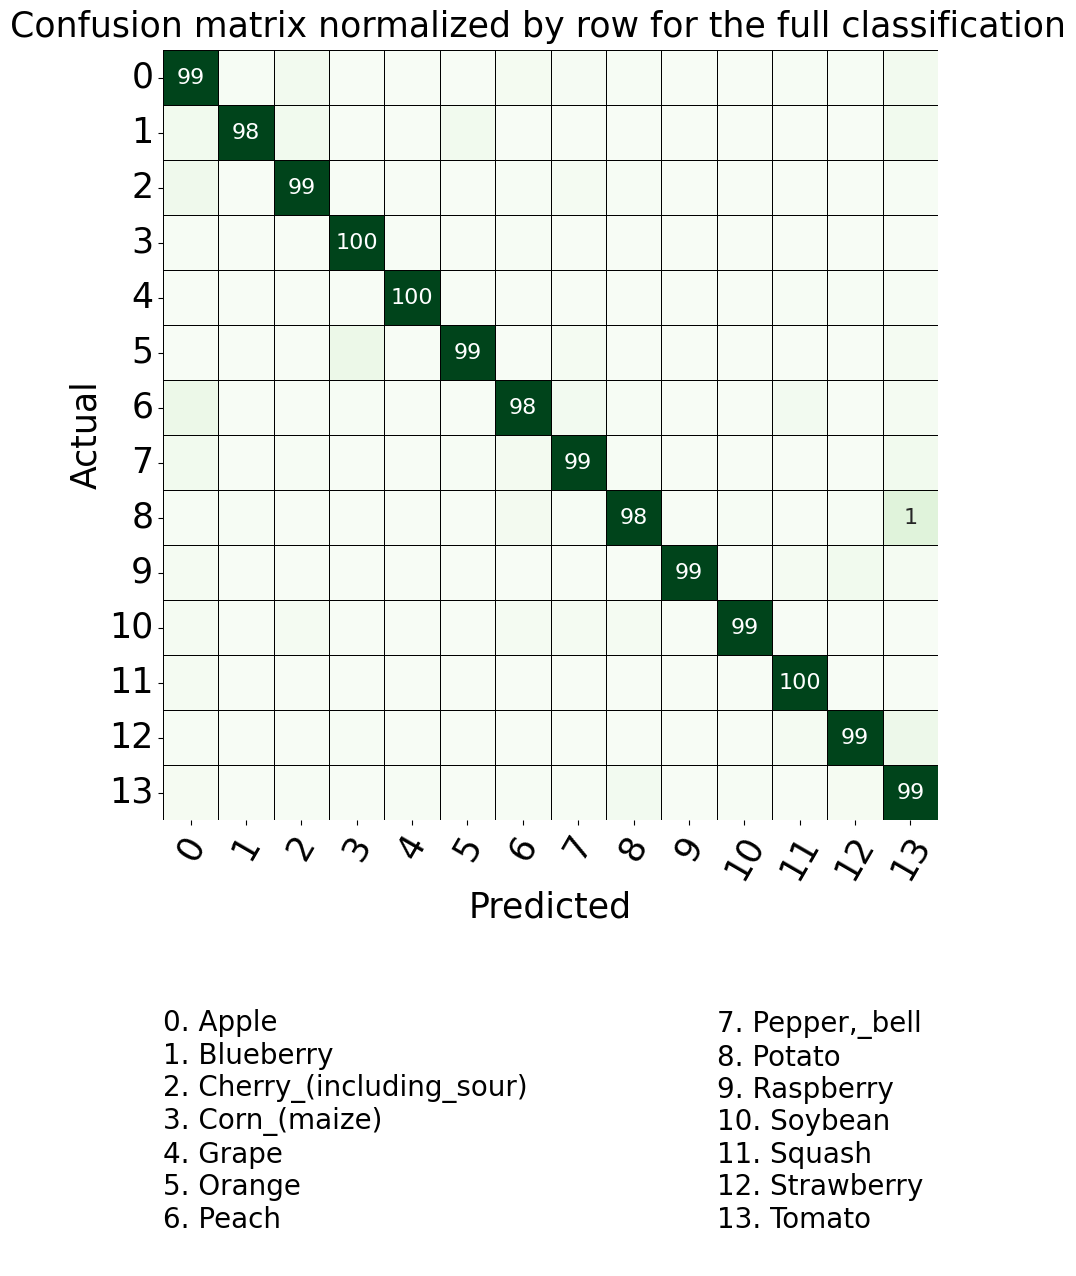

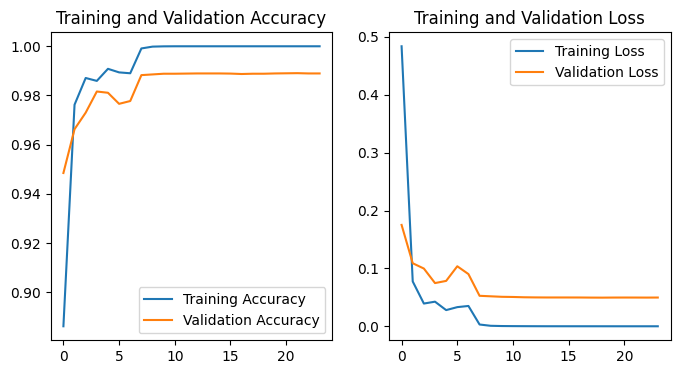

In [13]:
# CNN Pixels
ds_names = ['ps', 'npd', 'pv_color', 'pv_seg']
ds_full_names = ['Plant Seedlings', 'New Plant Diseases', 'Plantvillage Colored', 'Plantvillage Segmented']
i = 1
target ='species_img'

ds_name = ds_names[i]
config = '3000-InceptionResNetV2'

# Load results
path = f'data/model/{target}/{ds_name}/{config}/'
# model = load_model(path + '/cnn.keras')
report = pd.read_csv(path + 'report.csv', index_col=0)
history = pd.read_csv(path + 'history.csv')
conf = np.load(path + 'mat_conf.npy')

# Show results
# model.summary()
display(report.T.sort_values('precision', ascending=False))
show_heatmap(conf, report, figsize=(10,10))

print('Best accuracy:', max(history.val_accuracy))
x = range(history.shape[0])
plot_acc_loss(history)

## Visualisation du gain de performance avec du fine tuning

Best accuracy: 0.9871386289596558


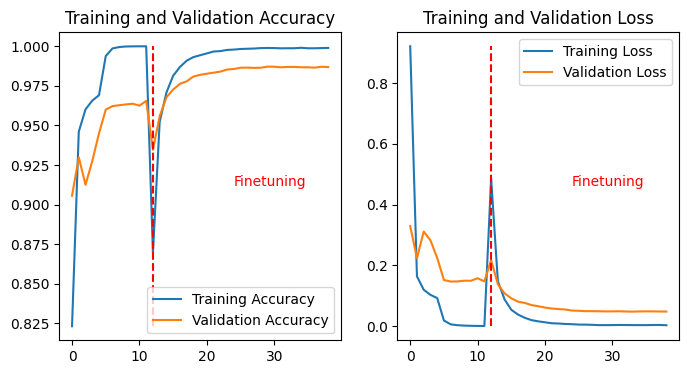

In [41]:
# CNN Pixels
ds_names = ['npd', 'pv_color', 'pv_seg']
ds_full_names = ['New Plant Diseases', 'Plantvillage Colored', 'Plantvillage Segmented']
i = 0
target ='img'

ds_name = ds_names[i]
config = '3000-xception'
config_finetuned = config + '-finetuned'

# Load results
path = f'data/model/{target}/{ds_name}/{config}/'
path_finetuned = f'data/model/{target}/{ds_name}/{config_finetuned}/'

history = pd.read_csv(path + 'history.csv')
history_finetuned = pd.read_csv(path_finetuned + 'history.csv')
history_merged = pd.concat([history, history_finetuned])

# Show results
print('Best accuracy:', max(history_merged.val_accuracy))
x = range(history_merged.shape[0])
plot_acc_loss(history_merged)
# Add vertical lines
plt.subplot(1, 2, 1)
plt.vlines(history.shape[0], history.accuracy.min(), 1, colors='r', linestyles='dashed', label='Finetuning')
plt.text(history.shape[0] * 1.2, (history.accuracy.max() + history.accuracy.min()) / 2, 'Finetuning', color='r')
plt.subplot(1, 2, 2)
plt.vlines(history.shape[0], 0, history.loss.max(), colors='r', linestyles='dashed', label='Finetuning')
plt.text(history.shape[0] * 1.2, (history.loss.max() + history.loss.min()) / 2, 'Finetuning', color='r')
plt.show()

# Visualisation du meilleur modèle

,precision,recall,f1-score,support
Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1.000000,0.997674,0.998836,430.000000
Strawberry___healthy,1.000000,1.000000,1.000000,456.000000
Raspberry___healthy,1.000000,0.997753,0.998875,445.000000
Grape___healthy,1.000000,1.000000,1.000000,423.000000
Soybean___healthy,0.998016,0.996040,0.997027,505.000000
Orange___Haunglongbing_(Citrus_greening),0.998008,0.996024,0.997015,503.000000
Potato___Early_blight,0.997942,1.000000,0.998970,485.000000
"Pepper,_bell___Bacterial_spot",0.997895,0.991632,0.994753,478.000000
Corn_(maize)___healthy,0.997854,1.000000,0.998926,465.000000
Grape___Black_rot,0.997845,0.980932,0.989316,472.000000


Meilleur modèle: data/model/img/npd/3000-xception-finetuned/
Best accuracy: 0.9871386289596558


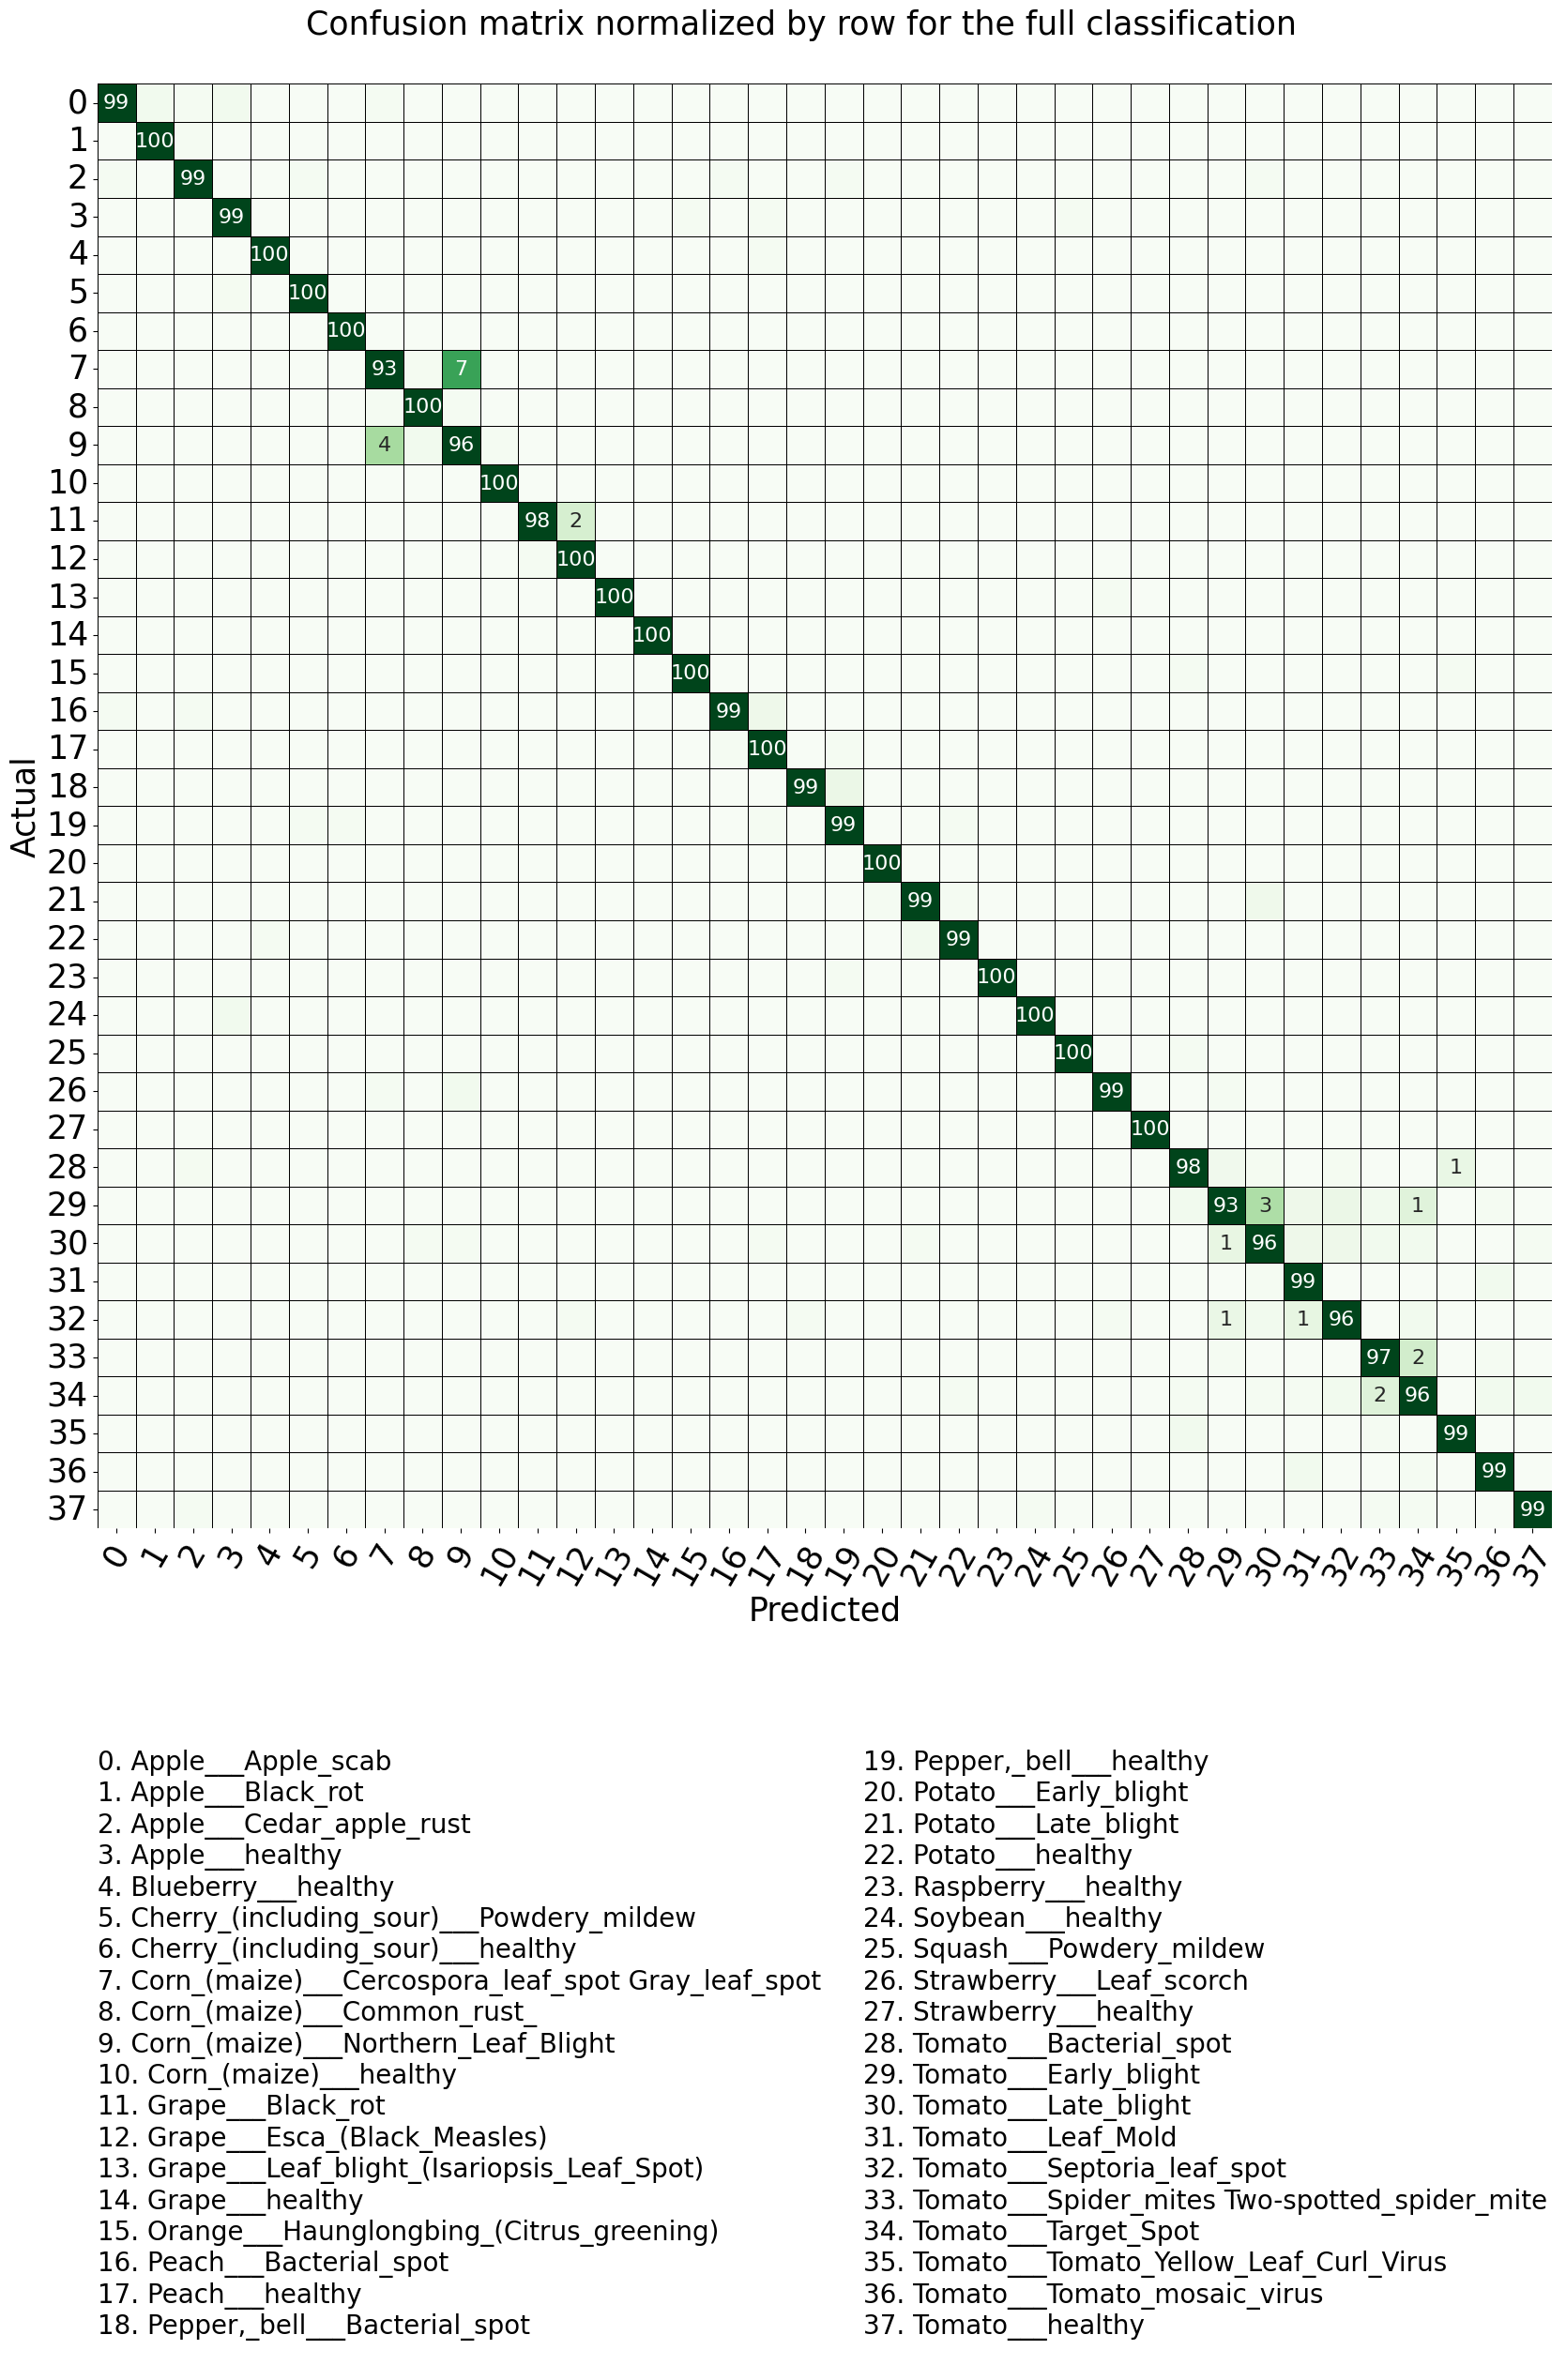

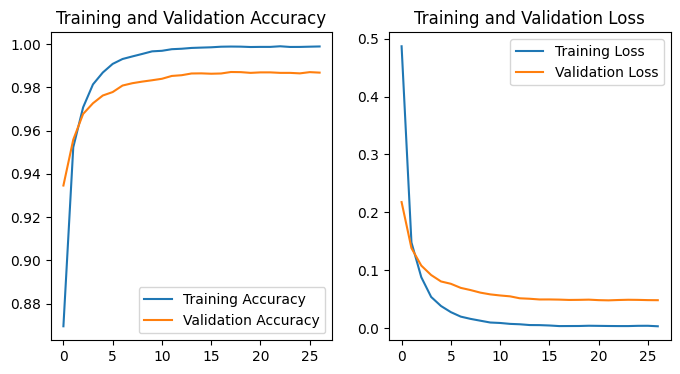

In [16]:
# CNN Pixels
ds_names = ['ps', 'npd', 'pv_color', 'pv_seg']
ds_full_names = ['Plant Seedlings', 'New Plant Diseases', 'Plantvillage Colored', 'Plantvillage Segmented']
i = 1

ds_name = ds_names[i]
path = get_best_model(ds_name, dir='img')

# Load results
report = pd.read_csv(path+'report.csv', index_col=0)
history = pd.read_csv(path+'history.csv')
conf = np.load(path+'mat_conf.npy')
# model = load_model(path+'cnn.keras')

# Show results
# model.summary()
display(report.T.sort_values('precision', ascending=False))
print("Meilleur modèle:", path)
show_heatmap(conf / conf.sum(axis=1, keepdims=True), report)

print('Best accuracy:', max(history.val_accuracy))
plot_acc_loss(history)

## Grad cam

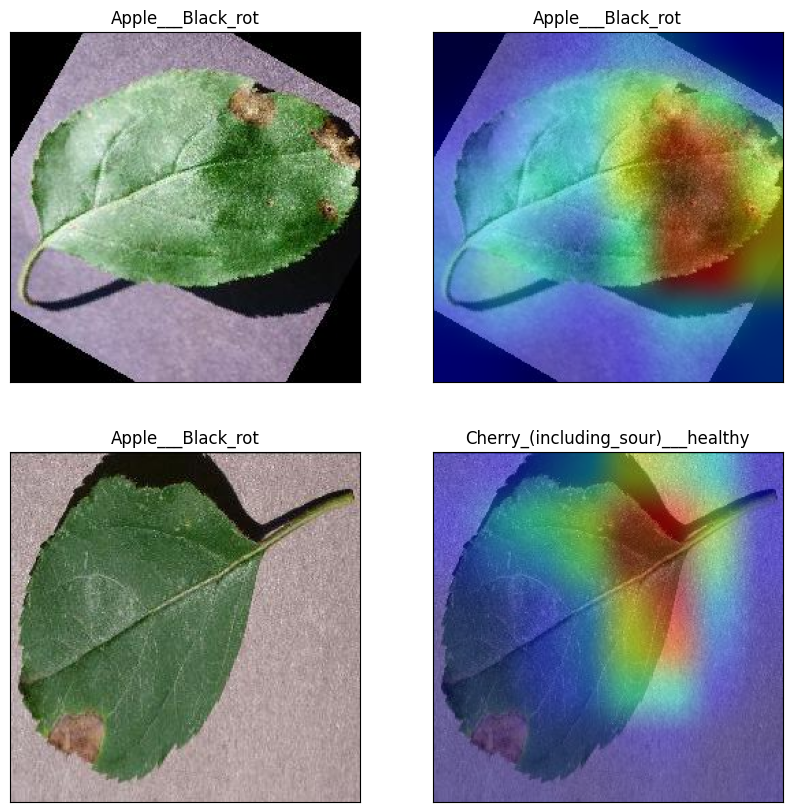

In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    'data/new-plant-diseases-dataset/',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=128)

class_names = val_ds.class_names

def display_gradcam(img_path, model, model_name, alpha=0.4):
    layers = {'vgg16': 'block5_conv3', 'resnet50': 'conv5_block3_out', 'inceptionv3': 'mixed10', 'xception': 'block14_sepconv2_act'}
    # Compute heatmap
    img = tf.keras.utils.load_img(img_path, target_size=(256,256,3))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255. # Normalize between 0-1 -> No need rescale layer

    # Create model with access to base model layers
    x = model.layers[1].output
    for layer in model.layers[2:]:
        x = layer(x)
    pretrained_model = tf.keras.Model(model.layers[1].inputs, x)
    pretrained_model.layers[-1].activation = None # Remove softmax

    # Create grad model
    grad_model =tf.keras.models.Model(inputs=pretrained_model.inputs,
                                       outputs=[pretrained_model.get_layer(layers[model_name]).output,
                                                pretrained_model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    # Display heatmap
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    heatmap = np.uint8(255 * heatmap)
    jet = mpl.colormaps["jet"]
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    plt.imshow(superimposed_img)
    plt.title(class_names[pred_index])
    plt.xticks([])
    plt.yticks([])

    return class_names[pred_index] == img_path.split('/')[-2]


# Gradcam of a correct prediction and a wrong one
model = load_model('data/model/img/npd/3000-xception-finetuned/cnn.keras')
plt.figure(figsize=(10,10))
success = False
# Image successfully predicted
while not success:
    img_path = get_random_img_path('data/new-plant-diseases-dataset')
    plt.subplot(2, 2, 1)
    plt.imshow(tf.keras.utils.load_img(img_path))
    plt.title(img_path.split('/')[-2])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2, 2, 2)
    success = display_gradcam(img_path, model, 'xception', alpha=0.8)

# Image badly predicted
while success:
    img_path = get_random_img_path('data/new-plant-diseases-dataset')
    img = tf.keras.utils.load_img(img_path, target_size=(256,256,3))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    output = class_names[model.predict(img_array, verbose=0).argmax()]
    if output == img_path.split('/')[-2]:
        continue

    plt.subplot(2, 2, 3)
    plt.imshow(tf.keras.utils.load_img(img_path))
    plt.title(img_path.split('/')[-2])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2, 2, 4)
    success = display_gradcam(img_path, model, 'xception', alpha=0.8)

# Gradcam grid
# model = load_model('data/model/img/npd/3000-xception-finetuned/cnn.keras')
# classes = os.listdir('data/new-plant-diseases-dataset/')
# classes = sorted(classes)
# x,y = len(classes),8
# plt.figure(figsize=(y, x))
# for i in tqdm(range(x*y)):
#     plt.subplot(x,y,i+1)
#     img_path = get_random_img_path(f'data/new-plant-diseases-dataset/{classes[i//y]}')
#     display_gradcam(img_path, model, 'xception', alpha=0.8)
#     plt.title('')
#     if i%y==0:
#         plt.ylabel(classes[i//y], rotation=0, ha='right')
# plt.subplots_adjust(wspace=0, hspace=0)